In [3]:
import numpy as np
import pandas as pd
import glob
import matplotlib.pyplot as plt
import seaborn as sns

#sns.set(font_scale=1.5, context='paper', style='white')
%config InlineBackend.figure_format = 'retina'
plt.rcParams["font.family"] = "Gentium"
plt.rcParams['mathtext.fontset'] = "cm"

In [4]:
phase, wave, flux = np.loadtxt('../piscola/src/piscola/templates/guy07/salt2_template_0.dat').T
phase_mak = phase==0
sed_wave, sed_flux = wave[phase_mak], flux[phase_mak]

bessell_files = [filt_file for filt_file in glob.glob('filters/Bessell/*') if 'B.dat' in filt_file or 'V.dat' in filt_file]
bessell_filters = [filt_file.split('/')[-1][:-4] for filt_file in glob.glob('filters/Bessell/*') if 'B.dat' in filt_file or 'V.dat' in filt_file]

## Shifting the filters

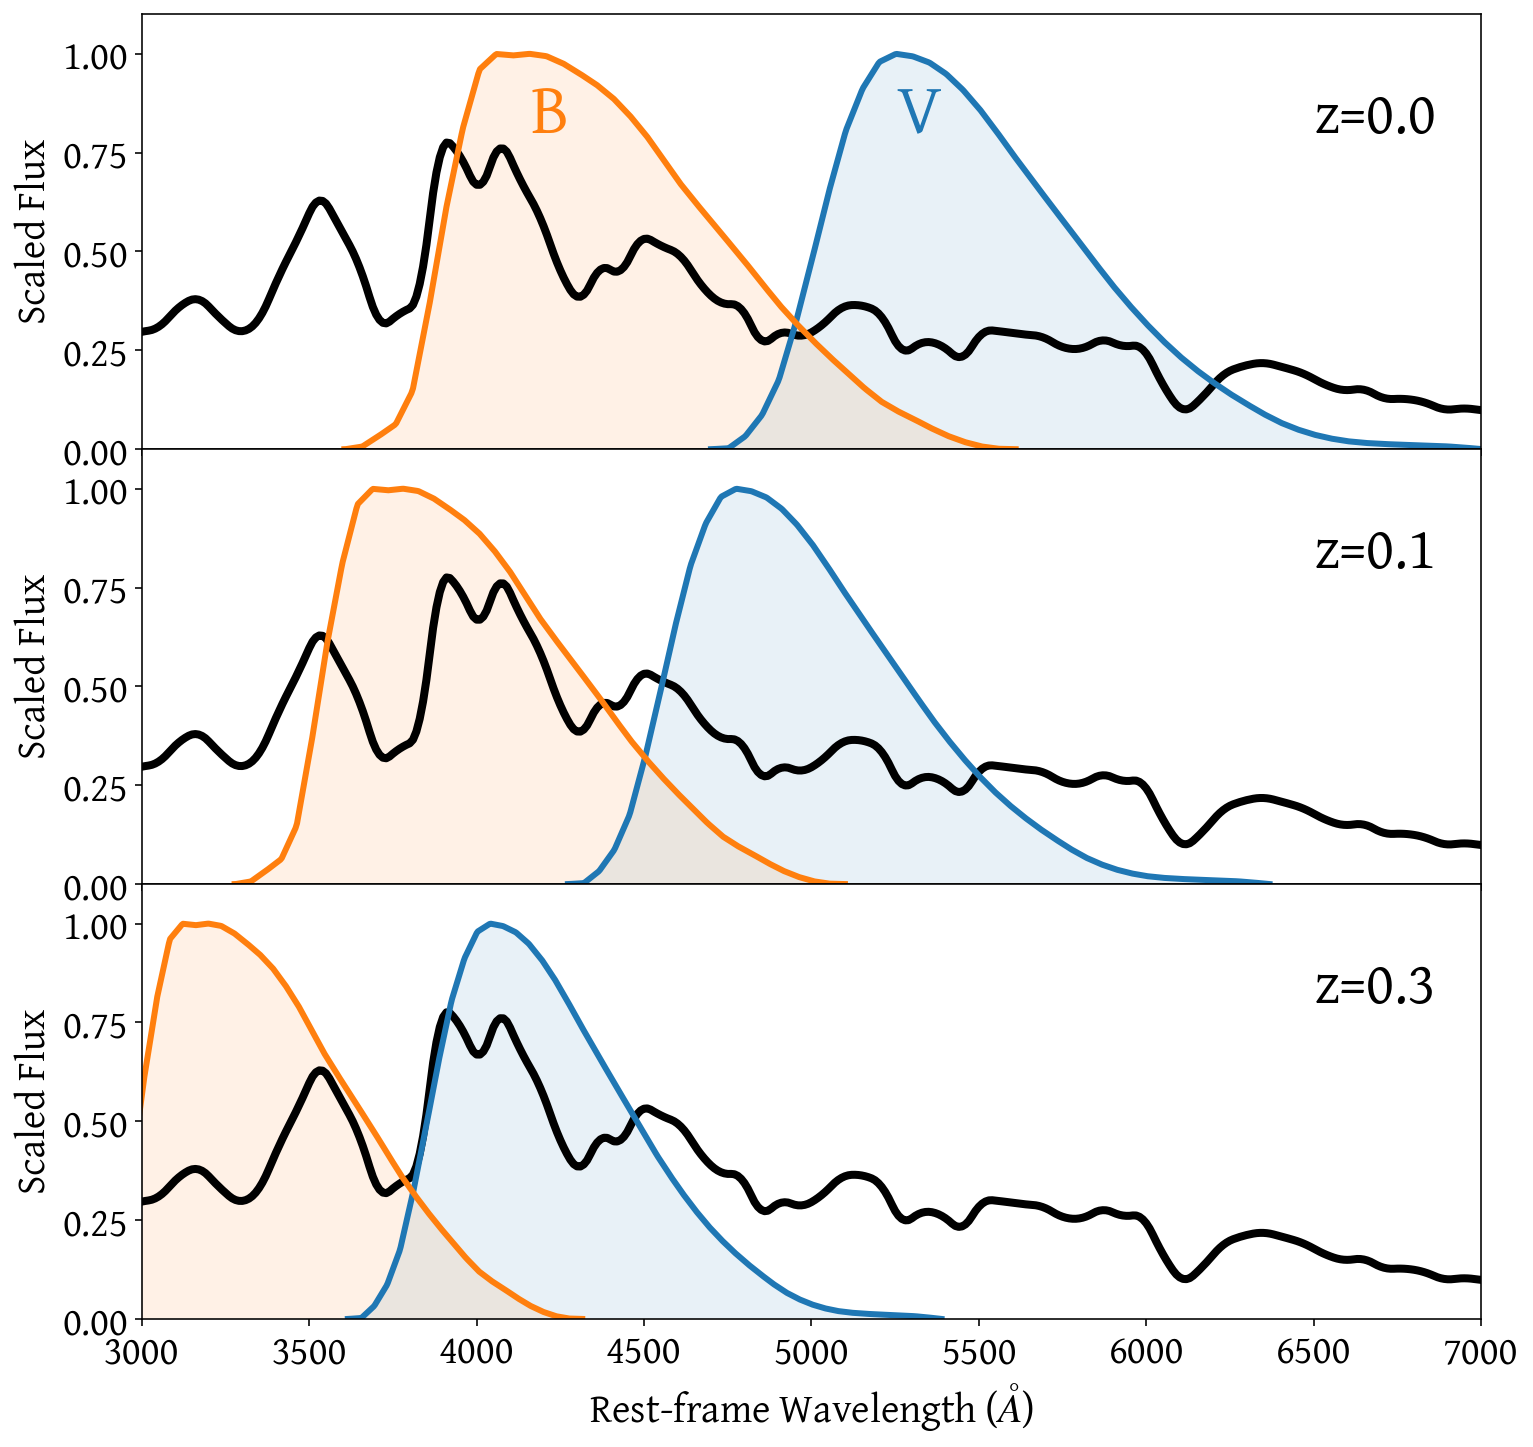

In [5]:
fontsize = 20
wave_v, trans_v = np.loadtxt(bessell_files[1]).T
z_list = [0, 0.1, 0.3]

f, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

for i, z in enumerate(z_list):
    ax[i].plot(sed_wave, sed_flux*1.4, label=r'SN Ia SED', lw=4, color='k')

    for filt_file, filt_name in zip(bessell_files, bessell_filters):
        wave, trans = np.loadtxt(filt_file).T
        bs = ax[i].plot(wave, trans, label=filt_name, lw=2, ls='')
        
        wave = wave/(1+z)
        ax[i].plot(wave, trans, label=filt_name, lw=3, color=bs[0].get_color())
        
        ax[i].fill_between(wave, trans, 0.0, alpha=0.1)
        if i==0:
            ax[i].text(wave[trans==trans.max()], 0.8, filt_name[-1], fontsize=35, color=bs[0].get_color())
        
    ax[i].text(6500, 0.8, f'z={z:.1f}', fontsize=30)

    ax[i].set_ylabel('Scaled Flux', fontsize=fontsize)
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    #ax[i].legend(fontsize=18)
    
ax[-1].set_xlabel(r'Rest-frame Wavelength ($\AA$)', fontsize=fontsize)
ax[-1].set_xlim(3000, 7000)
ax[-1].set_ylim(0, 1.1)
plt.subplots_adjust(hspace=0)

#plt.savefig('plots/k_correction.pdf', bbox_inches='tight')
plt.show()

## Shifting the SED

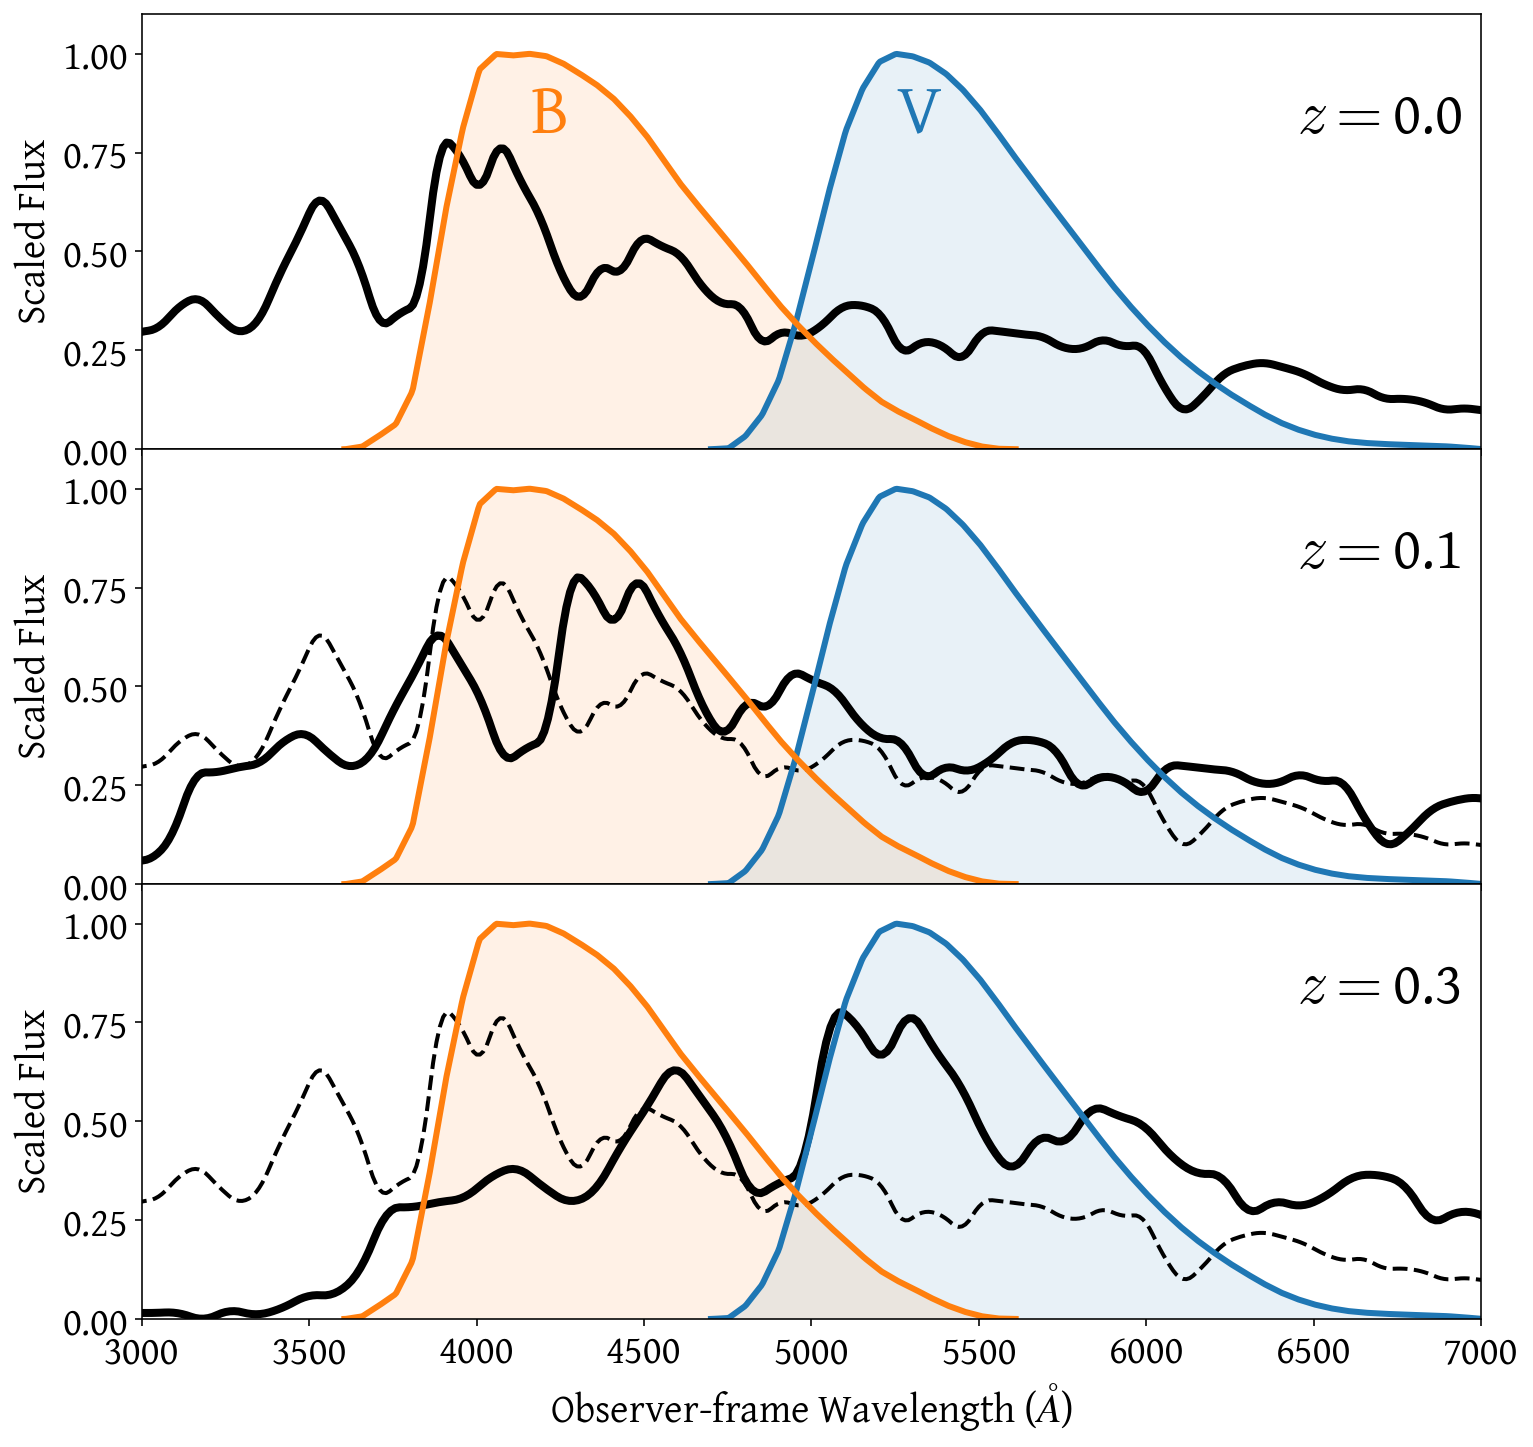

In [12]:
fontsize = 20
wave_v, trans_v = np.loadtxt(bessell_files[1]).T
z_list = [0, 0.1, 0.3]

f, ax = plt.subplots(3, 1, figsize=(12, 12), sharex=True, sharey=True)

for i, z in enumerate(z_list):
    ax[i].plot(sed_wave*(1+z), sed_flux*1.4, label=r'SN Ia SED', lw=4, color='k')
    ax[i].plot(sed_wave, sed_flux*1.4, label=r'SN Ia SED', lw=2, ls='--', color='k')

    for filt_file, filt_name in zip(bessell_files, bessell_filters):
        wave, trans = np.loadtxt(filt_file).T
        bs = ax[i].plot(wave, trans, label=filt_name, lw=2, ls='')
        
        #wave = wave/(1+z)
        ax[i].plot(wave, trans, label=filt_name, lw=3, color=bs[0].get_color())
        
        ax[i].fill_between(wave, trans, 0.0, alpha=0.1)
        if i==0:
            ax[i].text(wave[trans==trans.max()], 0.8, filt_name[-1], fontsize=35, color=bs[0].get_color())
        
    ax[i].text(6450, 0.8, f'$z=${z:.1f}', fontsize=30)

    ax[i].set_ylabel('Scaled Flux', fontsize=fontsize)
    ax[i].xaxis.set_tick_params(labelsize=20)
    ax[i].yaxis.set_tick_params(labelsize=20)
    #ax[i].legend(fontsize=18)
    
ax[-1].set_xlabel(r'Observer-frame Wavelength ($\AA$)', fontsize=fontsize)
ax[-1].set_xlim(3000, 7000)
ax[-1].set_ylim(0, 1.1)
plt.subplots_adjust(hspace=0)

plt.savefig('plots/k_correction.pdf', bbox_inches='tight')
plt.show()